# Usage patterns in Ford GoBike bycicle sharing
## by Andrés Ingelmo Poveda

## Investigation Overview

In this investigation, I wanted to analyse the different usage patterns that motivates users to rent a bike. The main focus was the duration of the ride depending on other variables like the customer type, their genre, the day of the week they did the ride...

## Dataset Overview

The dataset includes 180,000+ observations regarding individual rides made in a bike-sharing system covering the greater San Francisco area during the month of February 2019.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
url = "https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv"
file = "fordgobikedata.csv"

# Function to get the file from the cloud
def get_file(url, file):
    # Get the file from the cloud
    content = requests.get(url).text
    # Write the file into "fordgobikedata.csv"
    with open(file, "w", encoding="utf-8") as f:
        f.write(content)
        
##Run only the first time to get the file from the cloud!
#get_file(url, file) ##<-- Remove "#" to run 

# Load the csv file into a pandas dataframe
ford = pd.read_csv(file)

In [3]:
#Create a copy of the original
ford_clean = ford.copy()

#Drop missing values 
ford_clean.dropna(inplace=True)

#Convert to date/time
ford_clean["start_time"] = pd.to_datetime(ford_clean["start_time"])
ford_clean["end_time"] = pd.to_datetime(ford_clean["end_time"])

#Divide date/time variables in order to plot it correctly
ford_clean["start_time_hour"] = pd.DatetimeIndex(ford_clean["start_time"]).hour.astype("category")
ford_clean["end_time_hour"] = pd.DatetimeIndex(ford_clean["end_time"]).hour.astype("category")

#Get day of the week for the start an end time.
ford_clean["start_time_weekday"] = ford_clean["start_time"].dt.dayofweek
ford_clean["end_time_weekday"] = ford_clean["end_time"].dt.dayofweek

#Convert day of the week to string
week_dict = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

ford_clean["start_time_weekday"].replace(week_dict, inplace=True)
ford_clean["end_time_weekday"].replace(week_dict, inplace=True)

#Convert to strings as not calculations are required for the data below
to_clean = ["start_station_id", "end_station_id", "bike_id"]

for i in to_clean:
    ford_clean[i] = ford_clean[i].fillna(0).astype(int).astype(str) 

    
#Convert to categorical values
ford_clean["member_gender"] = ford_clean["member_gender"].astype("category")
ford_clean["user_type"] = ford_clean["user_type"].astype("category")
ford_clean["member_birth_year"] = ford_clean["member_birth_year"].astype(int).astype("category")
ford_clean["bike_share_for_all_trip"] = ford_clean["bike_share_for_all_trip"].astype("category")
ford_clean["start_time_weekday"] = ford_clean["start_time_weekday"].astype("category")
ford_clean["end_time_weekday"] = ford_clean["end_time_weekday"].astype("category")

#Decade of birth
ford_clean["member_birth_decade"] = (ford_clean.member_birth_year.astype(int)//10*10)
ford_clean = ford_clean[ford_clean["member_birth_year"].astype(int) >= 1940]

#Duration limit
ford_clean = ford_clean[ford_clean["duration_sec"] <= 3600]

#Drop Columns not necessary for the analysis
ford_clean.drop(labels=["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"], axis=1, inplace=True);

In [4]:
#Set color
base_color = sb.color_palette()[0]

#Set Week Order
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

## Distribution of bike rides duration

The duration of the bike rides in the dataset goes from 0 seconds to roughly 3,600 seconds (1 hour). Most of the trips take around 400 seconds as the distribution takes on a unimodal shape.

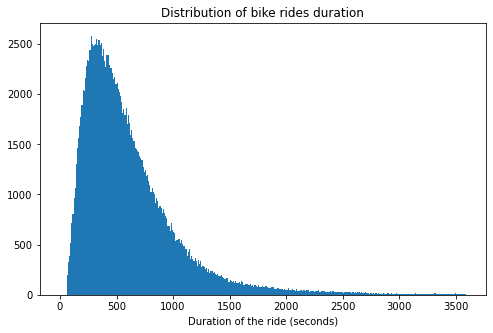

In [5]:
binsize = 10
bins = np.arange(0, ford_clean["duration_sec"].max(), binsize)

plt.figure(figsize=[8,5])
plt.hist(ford_clean["duration_sec"], bins=bins)
plt.title("Distribution of bike rides duration")
plt.xlabel("Duration of the ride (seconds)")
plt.show()

## Decade of birth of users distribution

The decade of birth of users goes from 1940s to 2000s. Most of the users of the platform were born between the 80s and the 90s. However, some of the old ones are used to technology and some users were born in th 40s and the 50s.

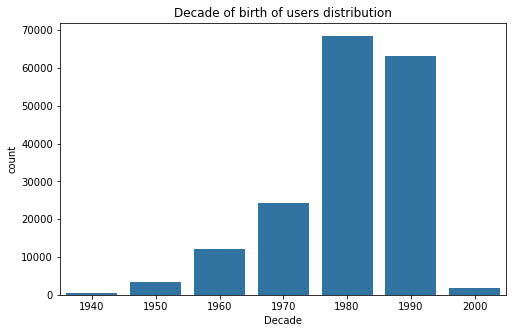

In [6]:
plt.figure(figsize=[8,5])
plt.title("Decade of birth of users distribution")
sb.countplot(data=ford_clean, x="member_birth_decade", color=base_color)
plt.xlabel("Decade")
plt.show()

## Weekday distribution

Most of the rides are done during the weekdays. It seems that on weekends, people use the service less.

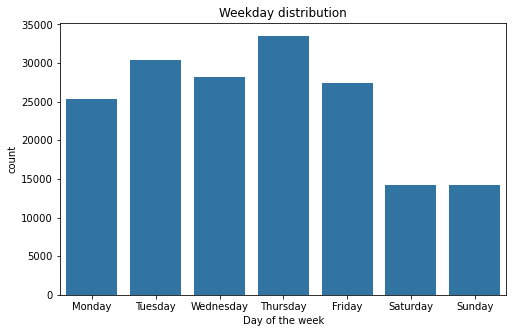

In [7]:
plt.figure(figsize=[8,5])
plt.title("Weekday distribution")
sb.countplot(data=ford_clean, x="start_time_weekday", order=week_order, color=base_color)
plt.xticks(rotation=0)
plt.xlabel("Day of the week")
plt.show()

## Hour distribution

It follows a bimodal distribution as most of the rides are done in two ranges of hours: from 7 to 9 and from 16 to 18. This is probably related to the busiest hours in any city: when most people commute to enter and leave their jobs.

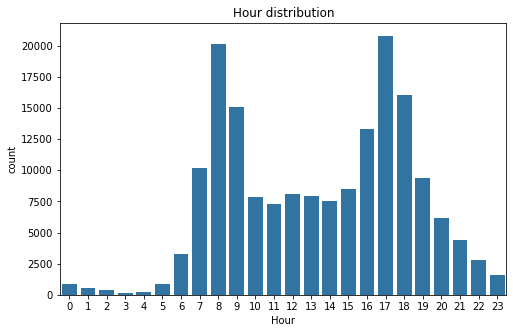

In [8]:
plt.figure(figsize=[8,5])
plt.title("Hour distribution")
sb.countplot(data=ford_clean, x="start_time_hour", color=base_color)
plt.xticks(rotation=0)
plt.xlabel("Hour")
plt.show()

## Duration of the ride vs user type

The dataset shows that the user type was relevant in the bike ride. Subscribers, probably because the cost of unlocking is lower, took rides that were longer than normal customers.

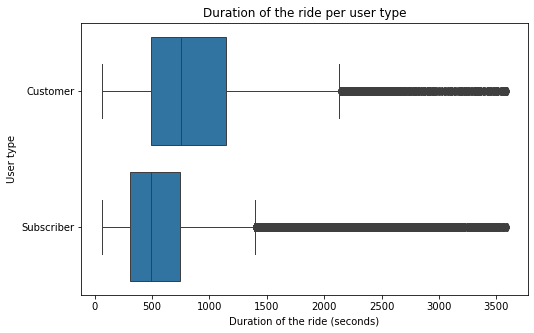

In [9]:
plt.figure(figsize=[8,5])
plt.title("Duration of the ride per user type")
sb.boxplot(data=ford_clean, y="user_type", x="duration_sec", color=base_color, linewidth=1)
plt.xticks(rotation=0)
plt.ylabel("User type")
plt.xlabel("Duration of the ride (seconds)")
plt.show()

## How does the population of the dataset look like?

Most of the users in the dataset are subscribers (probably because the use the bike more than non-users), and, of those subscribers, most of them are males (probably because men are more pronned to do physical activity than women). 

Like stated before, these subscribers were born mostly between the 80s and the 90s. However, it is important to notice that the customer distribution by decade is flatter. This may relate to the fact that people born in the 80s and 90s are more used to research about prices on the internet. 



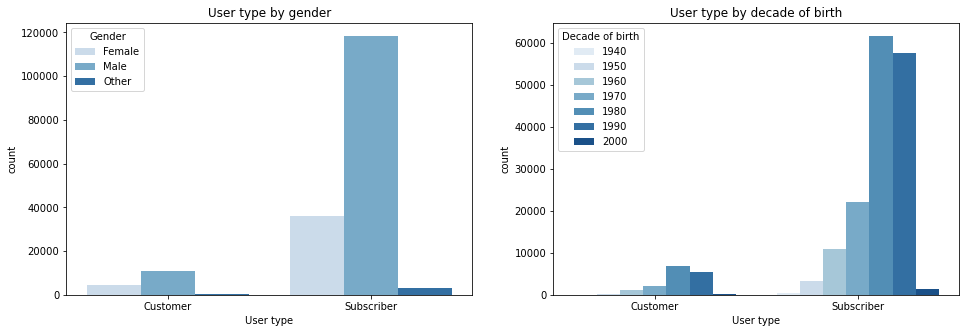

In [10]:
plt.figure(figsize=[16,5])

#User type by gender
plt.subplot(1,2,1)
sb.countplot(data=ford_clean, x="user_type", hue="member_gender", palette="Blues")
plt.legend(title="Gender")
plt.xlabel("User type")
plt.title("User type by gender")

#User type by decade of birth
plt.subplot(1,2,2)
sb.countplot(data=ford_clean, x="user_type", hue="member_birth_decade", palette="Blues")
plt.legend(title="Decade of birth")
plt.xlabel("User type")
plt.title("User type by decade of birth")

plt.show()

## What is the average ride?

The average ride can be expressed in terms of few different variables. In this case, depending of the day of the week and the user type or gender.

When looking at the chart, we can notice that subsribers take substantially shorter rides than customers. We can also see that, on weeekends, the rides were longer. This may be related with people taking rides as a leisure activity rather than commuting. During the week, the use the bike to work but during the weekends, for fun.

Taking a look at the gender distribution, we can justify what stated above. Rides on weekends were longer. And not only that, females take longer rides than men. Probably related to the fact than men ride faster.



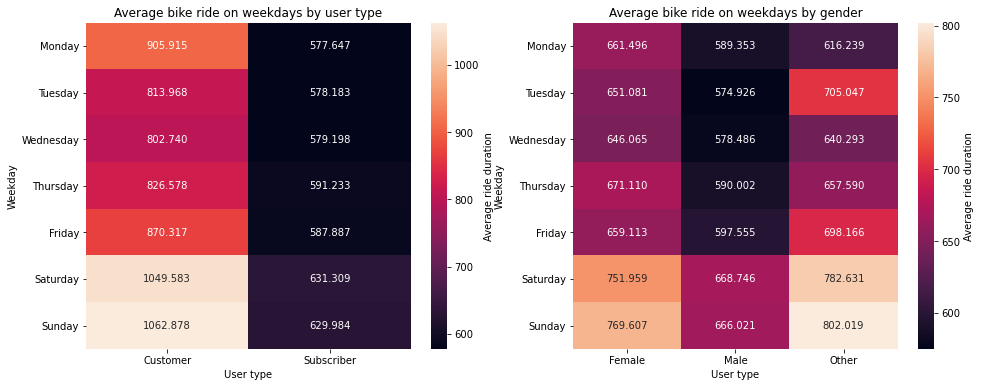

In [11]:
plt.figure(figsize=[16,6])

#User type by gender
plt.subplot(1,2,1)
cat_means = ford_clean.groupby(['user_type', 'start_time_weekday']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'start_time_weekday', columns = 'user_type', values = 'duration_sec_avg')
cat_means = cat_means.reindex(week_order)
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Average ride duration'})
plt.xlabel("User type")
plt.ylabel("Weekday")
plt.title("Average bike ride on weekdays by user type")

#User type by decade of birth
plt.subplot(1,2,2)
cat_means = ford_clean.groupby(['member_gender', 'start_time_weekday']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'start_time_weekday', columns = 'member_gender', values = 'duration_sec_avg')
cat_means = cat_means.reindex(week_order)
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Average ride duration'})
plt.xlabel("User type")
plt.ylabel("Weekday")
plt.title("Average bike ride on weekdays by gender")

plt.show()

## Does the hour impact in the duration of the ride?

Subscribers take the bike for shorter rides than customers, we know that, but it is important to notice that all the bike rides done by subscribers are more consistent than the ones done by customers. It does not matter the hour a subscriber takes the bike, the ride is going to be around 500 seconds (or 8.5 minutes).

This might be explained by the fact that subscribers are daily drivers. They pay a subscription to ride the bike more frequently than customers. As they know the city better, they can get to places faster than customers.

Other theory, stated above, is that customers can take the bike not for commuting but pleasure. This can explain the longer rides.



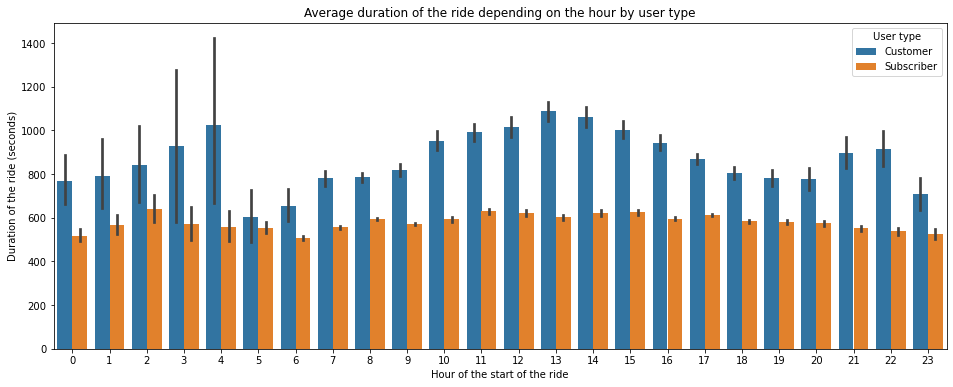

In [12]:
plt.figure(figsize=[16,6])

#User type by gender
ax = sb.barplot(data=ford_clean, x= "start_time_hour", y="duration_sec", hue="user_type")
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'user_type')
plt.xlabel("Hour of the start of the ride")
plt.ylabel("Duration of the ride (seconds)")
plt.title("Average duration of the ride depending on the hour by user type")
plt.legend(title="User type")

plt.show()

## Does the year of birth impact in the duration?

The decade of birth do impact in the usage of the bike. Users born in the 40s, 50s and 60s took longer rides, on average, than people born in the 80s and the 90s. The older you are, the more time you spend on the bike.



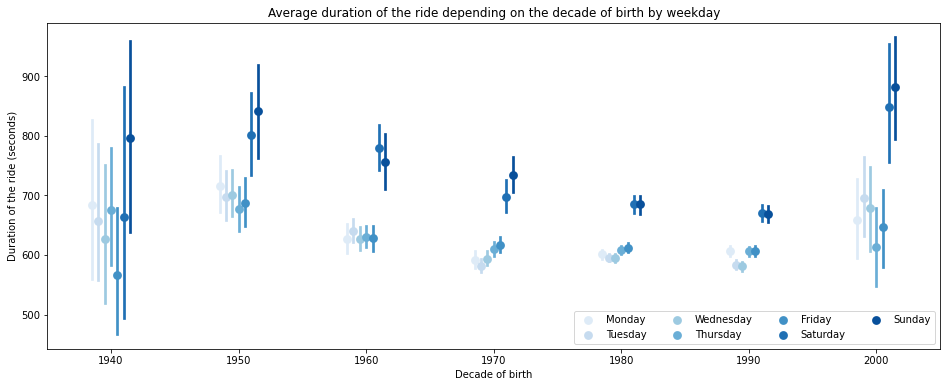

In [13]:
plt.figure(figsize=[16,6])

#User type by gender
ax = sb.pointplot(data = ford_clean, x = 'member_birth_decade', y = 'duration_sec', hue = 'start_time_weekday', dodge = 0.3, linestyles = "", hue_order=week_order, palette="Blues")
ax.legend(loc="lower right", ncol=4)
plt.xlabel("Decade of birth")
plt.ylabel("Duration of the ride (seconds)")
plt.title("Average duration of the ride depending on the decade of birth by weekday")

plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!